In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\himan\OneDrive\VS CODE DATA\Project Datasets\Health_insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(data.info())
print("-"*50)
print(data['region'].value_counts().sort_values())
print("-"*50)
print(data['children'].value_counts().sort_values())
print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------------------------------------
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64
--------------------------------------------------
children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64
--------------------------------------------------


In [4]:
clean_data = {'sex': {'male': 0, 'female': 1},
              'smoker': {'no': 0, 'yes': 1},
              'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
              }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

print(data_copy.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\2055088663.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace=True)


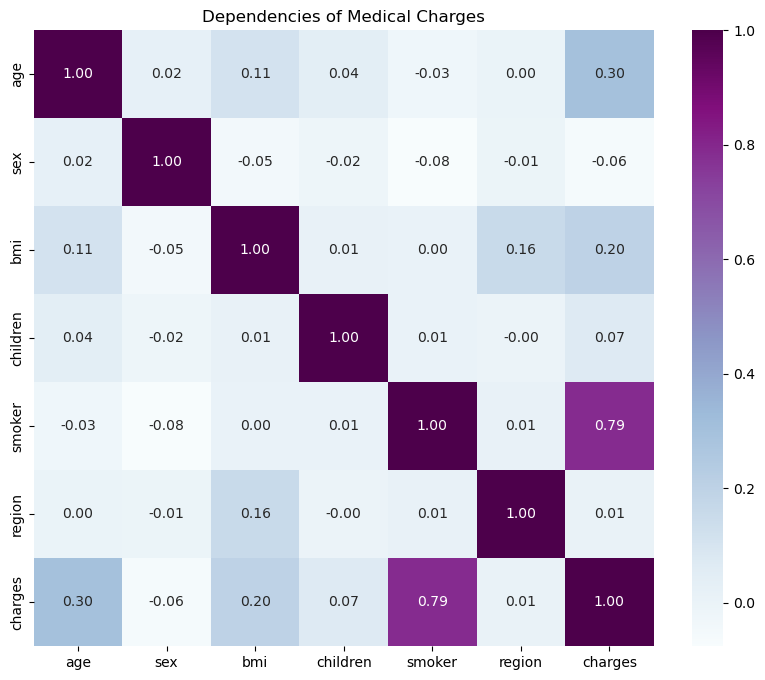

In [5]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [6]:
print(data['sex'].value_counts().sort_values())
print("-"*50)
print(data['smoker'].value_counts().sort_values())
print("-"*50)
print(data['region'].value_counts().sort_values())
print("-"*50)


sex
female    662
male      676
Name: count, dtype: int64
--------------------------------------------------
smoker
yes     274
no     1064
Name: count, dtype: int64
--------------------------------------------------
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64
--------------------------------------------------


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\3820863794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=data_copy, palette='husl')


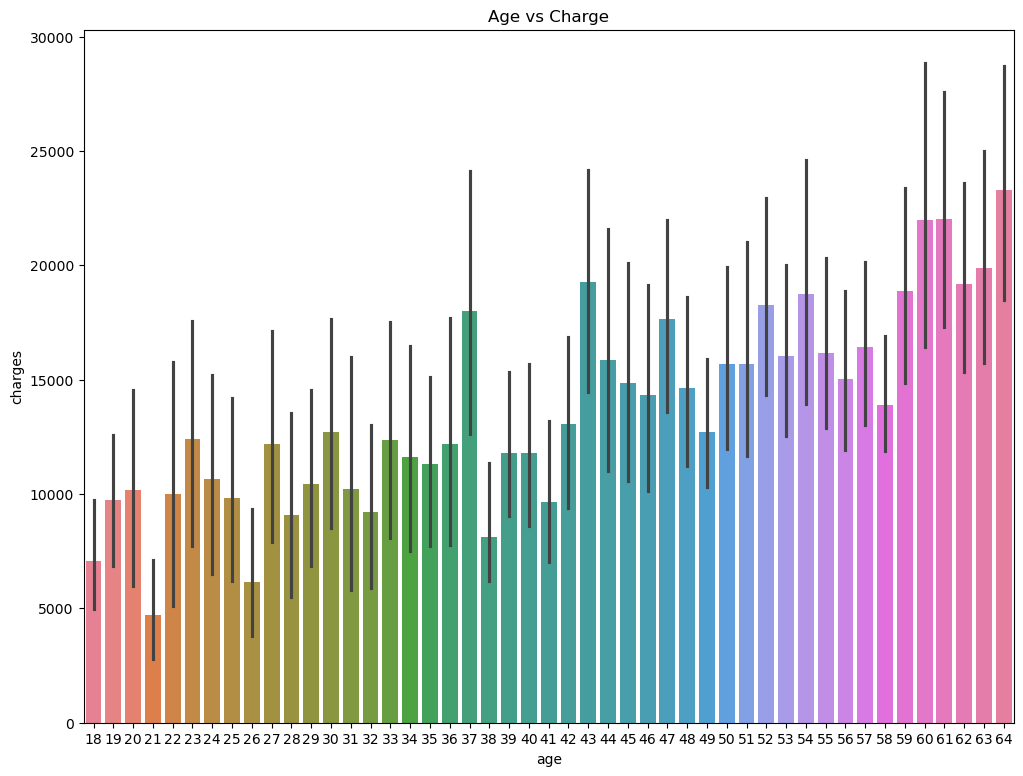

In [7]:
plt.figure(figsize=(12, 9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=data_copy, palette='husl')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_3080\730140494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=data_copy, palette='Set3')


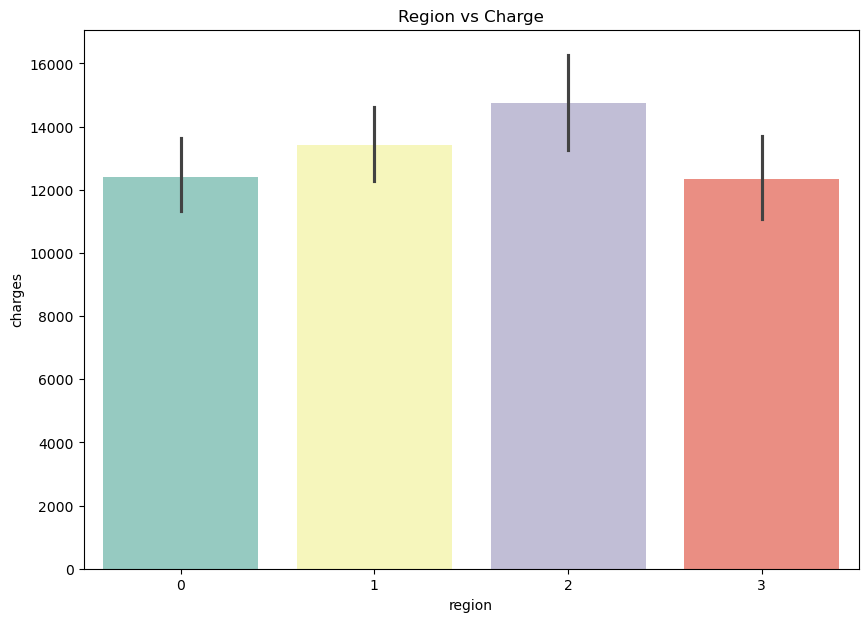

In [8]:
plt.figure(figsize=(10, 7))
plt.title('Region vs Charge')
sns.barplot(x='region', y='charges', data=data_copy, palette='Set3')
plt.show()

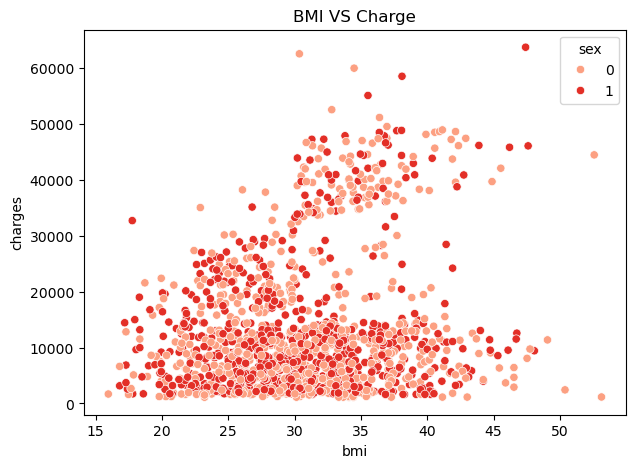

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=data_copy, palette='Reds')
plt.title('BMI VS Charge')
plt.show()

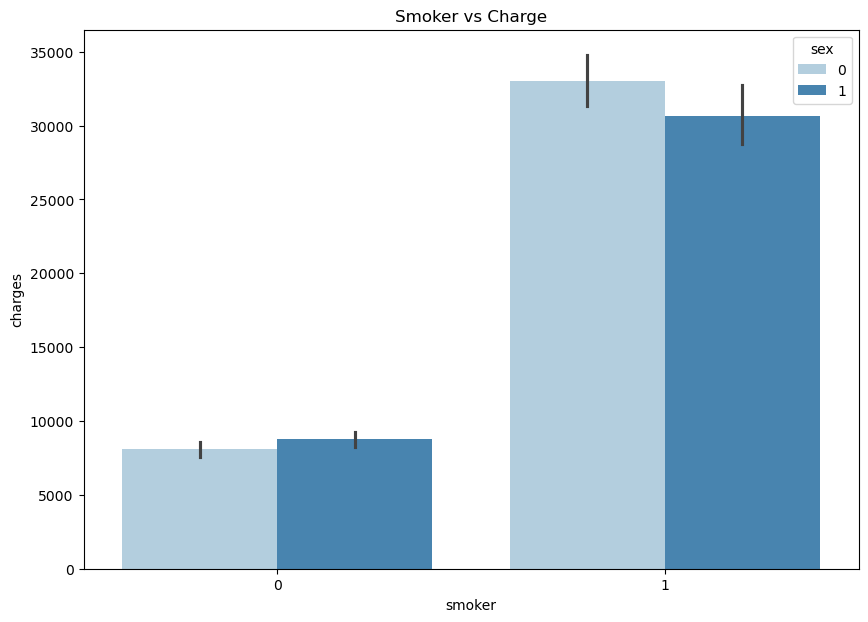

In [10]:
plt.figure(figsize=(10, 7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker', y='charges', data=data_copy, palette='Blues', hue='sex')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_3080\568026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='charges', data=data_copy, palette='Set1')


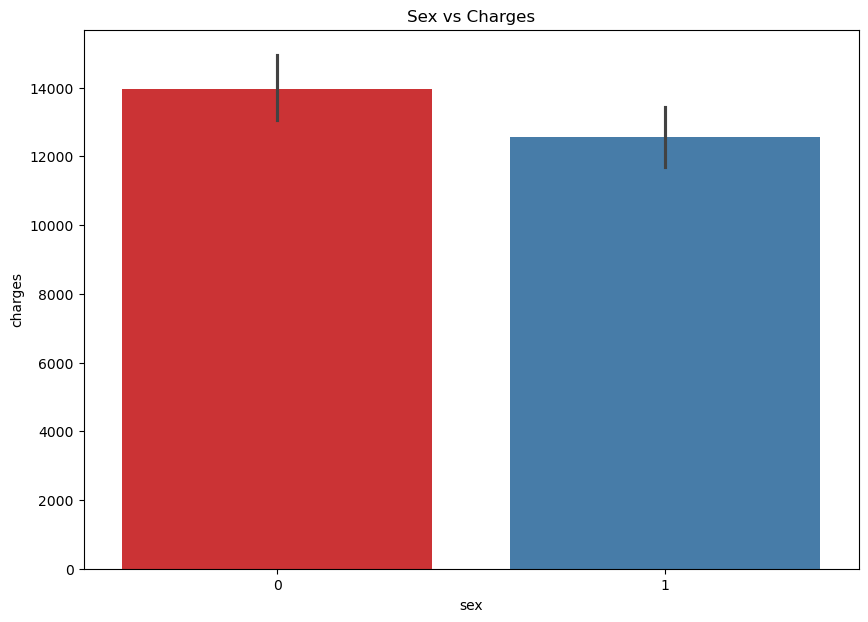

In [11]:
plt.figure(figsize=(10, 7))
plt.title('Sex vs Charges')
sns.barplot(x='sex', y='charges', data=data_copy, palette='Set1')
plt.show()

In [12]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col, data_copy[col].skew(), data_copy[col].kurt()))
print("-"*50)

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606
--------------------------------------------------


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\3959523914.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])


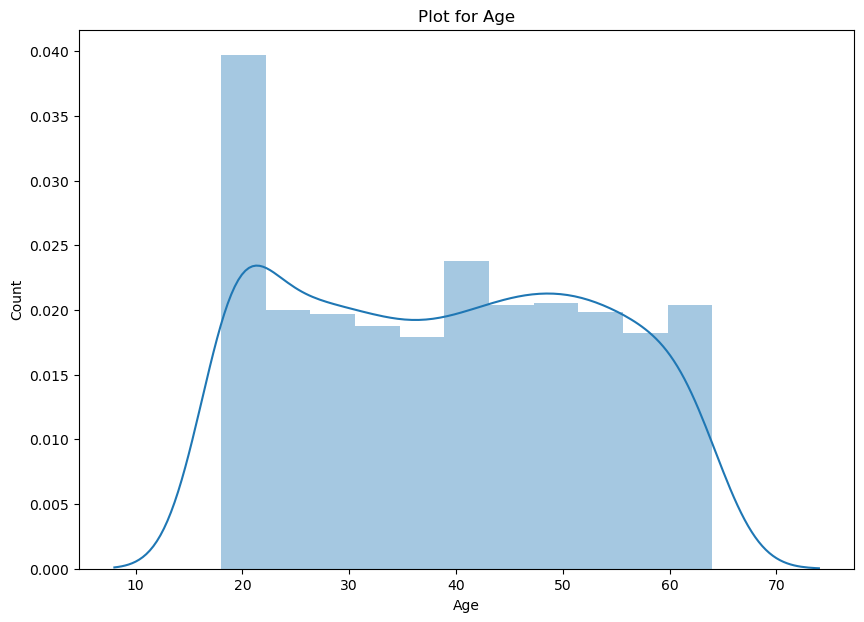

In [13]:

plt.figure(figsize=(10, 7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_3080\1813893779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['bmi'])


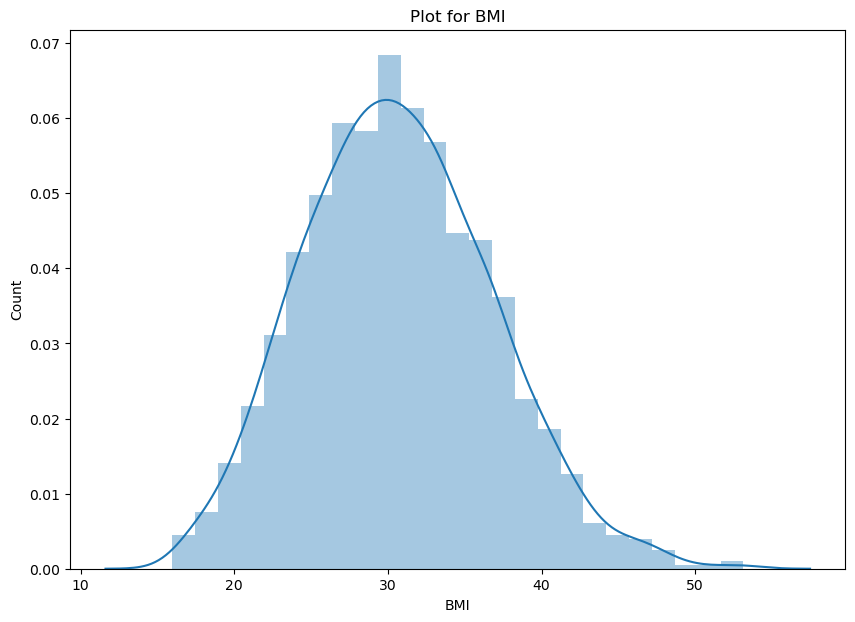

In [14]:
plt.figure(figsize=(10, 7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_3080\452788012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['charges'])


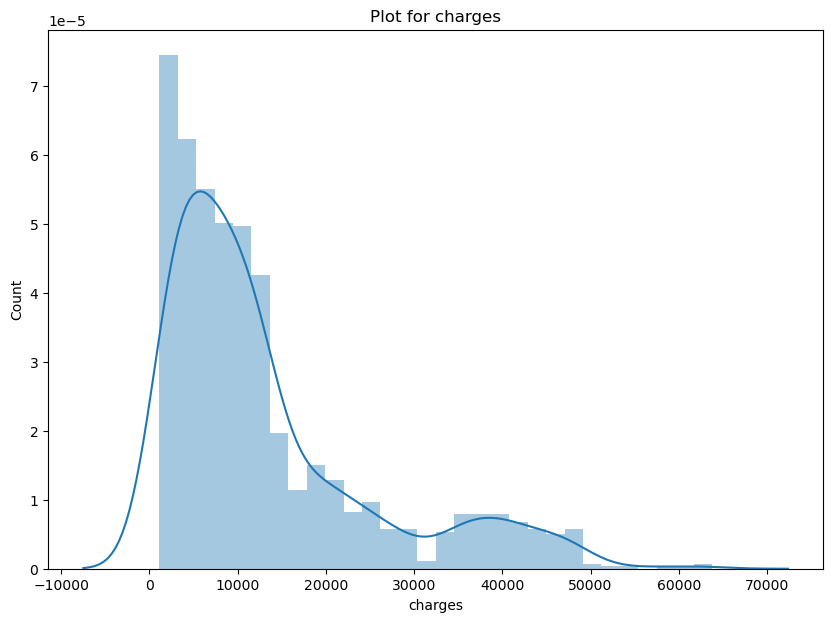

In [15]:
plt.figure(figsize=(10, 7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1, 1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1, 1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1, 1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

print(data_pre.head())

        age  sex       bmi  children  smoker  region   charges
0 -1.438764    1 -0.453320         0       1       3  0.298584
1 -1.509965    0  0.509621         1       0       2 -0.953689
2 -0.797954    0  0.383307         3       0       2 -0.728675
3 -0.441948    0 -1.305531         0       0       0  0.719843
4 -0.513149    0 -0.292556         0       0       0 -0.776802


Size of X_train_full :  (1070, 6)
--------------------------------------------------
Size of y_train_full :  (1070, 1)
--------------------------------------------------
Size of X_test_full :  (268, 6)
--------------------------------------------------
Size of y_test_full :  (268, 1)
--------------------------------------------------


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\3144296033.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


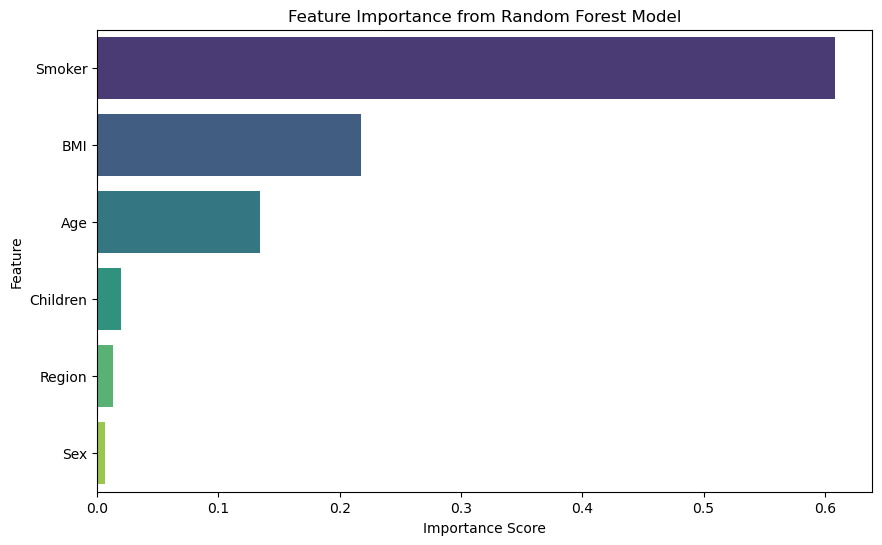

    Feature  Importance
2    Smoker    0.608618
5       BMI    0.217373
0       Age    0.134261
4  Children    0.019616
3    Region    0.013463
1       Sex    0.006669


In [17]:
# Step 1: Prepare the dataset with all specified features
X_full = data_pre[['age', 'sex', 'smoker', 'region', 'children', 'bmi']].values  # All features
y_full = data_pre['charges'].values.reshape(-1, 1)  # Target variable

# Step 2: Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Print sizes of the training and testing sets
print('Size of X_train_full : ', X_train_full.shape)
print("-" * 50)
print('Size of y_train_full : ', y_train_full.shape)
print("-" * 50)
print('Size of X_test_full : ', X_test_full.shape)
print("-" * 50)
print('Size of y_test_full : ', y_test_full.shape)
print("-" * 50)

# Step 3: Train the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor model
rf_full_model = RandomForestRegressor(random_state=42)

# Train the model
rf_full_model.fit(X_train_full, y_train_full.ravel())

# Step 4: Check feature importance
importances_full = rf_full_model.feature_importances_

# Step 5: Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': ['Age', 'Sex', 'Smoker', 'Region', 'Children', 'BMI'],
    'Importance': importances_full
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the importance values
print(feature_importance_df)


In [18]:
# Assuming data_pre has been preprocessed and includes the necessary features

# Step 1: Select only the four most important features
X = data_pre[['children', 'age', 'smoker', 'bmi']].values  # Select only the four features
y = data_pre['charges'].values.reshape(-1, 1)  # Target variable remains the same

# Step 2: Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes of the training and testing sets
print('Size of X_train : ', X_train.shape)
print("-" * 50)
print('Size of y_train : ', y_train.shape)
print("-" * 50)
print('Size of X_test : ', X_test.shape)
print("-" * 50)
print('Size of y_test : ', y_test.shape)
print("-" * 50)

Size of X_train :  (1070, 4)
--------------------------------------------------
Size of y_train :  (1070, 1)
--------------------------------------------------
Size of X_test :  (268, 4)
--------------------------------------------------
Size of y_test :  (268, 1)
--------------------------------------------------


In [19]:
# Linear Regression
print("\nLinear Regression Model - Performance")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import time

# Start the timer
start_time = time.time()
# Fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
# End the timer
end_time = time.time()
# Print the elapsed time
print(f"Execution time: {end_time - start_time} seconds")

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print("-"*50)
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print("-"*50)
print('RMSE : {0:.3f}'.format(rmse_linear))
print("-"*50)



Linear Regression Model - Performance
Execution time: 0.001997709274291992 seconds
R2_score (train) : 0.741
--------------------------------------------------
R2_score (test) : 0.781
--------------------------------------------------
RMSE : 0.482
--------------------------------------------------


In [20]:
# Random Forest Regressor
print("\nRandom Forest Regressor Model - Performance")
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor with the parameters
rf.fit(X_train, y_train.ravel())

# Performance evaluation on training data
y_pred_rf_train = rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Performance evaluation on test data
y_pred_rf_test = rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# Print performance metrics
print('R2 Score (train) : {0:.3f}'.format(r2_score_rf_train))
print("-" * 50)
print('R2 Score (test) : {0:.3f}'.format(r2_score_rf_test))
print("-" * 50)
print('RMSE : {0:.3f}'.format(rmse_rf))
print("-" * 50)


Random Forest Regressor Model - Performance
R2 Score (train) : 0.973
--------------------------------------------------
R2 Score (test) : 0.859
--------------------------------------------------
RMSE : 0.386
--------------------------------------------------


In [21]:
# Decision Tree Regressor
print("\nDecision Tree Regressor Model - Performance")
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor model
dt.fit(X_train, y_train)

# Performance evaluation on training data
y_pred_dt_train = dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Performance evaluation on test data
y_pred_dt_test = dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Calculate RMSE for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

# Print performance metrics for Decision Tree
print('R2 Score (train) : {0:.3f}'.format(r2_score_dt_train))
print("-" * 50)
print('R2 Score (test) : {0:.3f}'.format(r2_score_dt_test))
print("-" * 50)
print('RMSE : {0:.3f}'.format(rmse_dt))
print("-" * 50)


Decision Tree Regressor Model - Performance
R2 Score (train) : 0.998
--------------------------------------------------
R2 Score (test) : 0.732
--------------------------------------------------
RMSE : 0.532
--------------------------------------------------


In [22]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test)
         ]

predict = pd.DataFrame(data=models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
print(predict)
print("-"*50)

                      Model      RMSE  R2_Score(training)  R2_Score(test)
0         Linear Regression  0.481549            0.741089        0.781115
1  Random Forest Regression  0.385950            0.972630        0.859396
2  Decision Tree Regression  0.532441            0.998305        0.732404
--------------------------------------------------


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\3970495883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score(test)', y='Model', data=predict, palette='Reds')


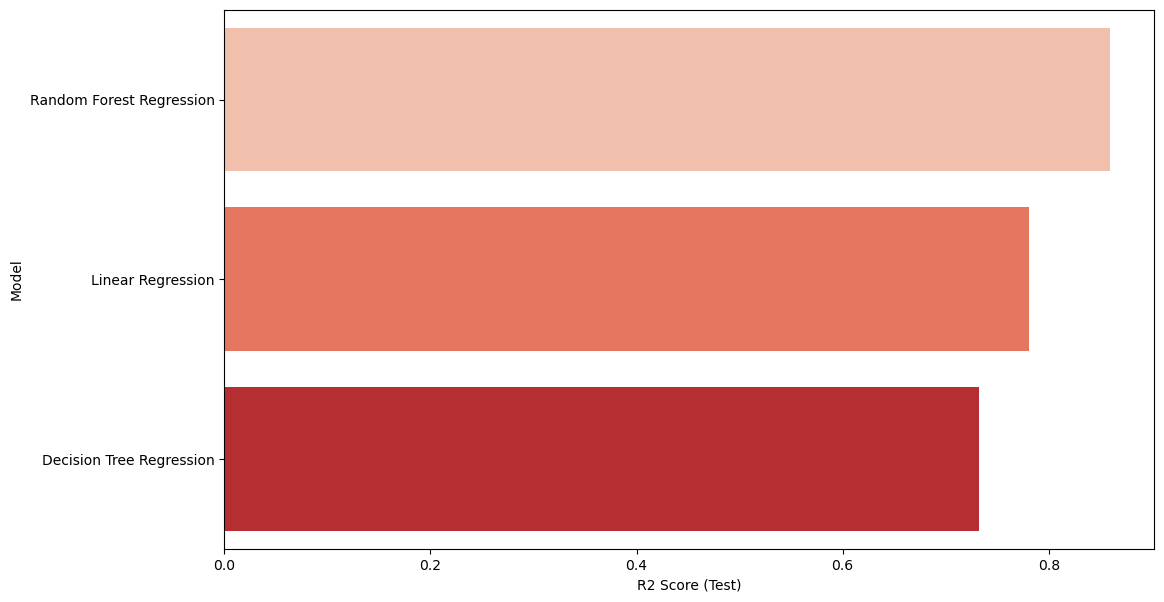

In [23]:
plt.figure(figsize=(12, 7))
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data=predict, palette='Reds')
plt.xlabel('R2 Score (Test)')
plt.ylabel('Model')
plt.show()

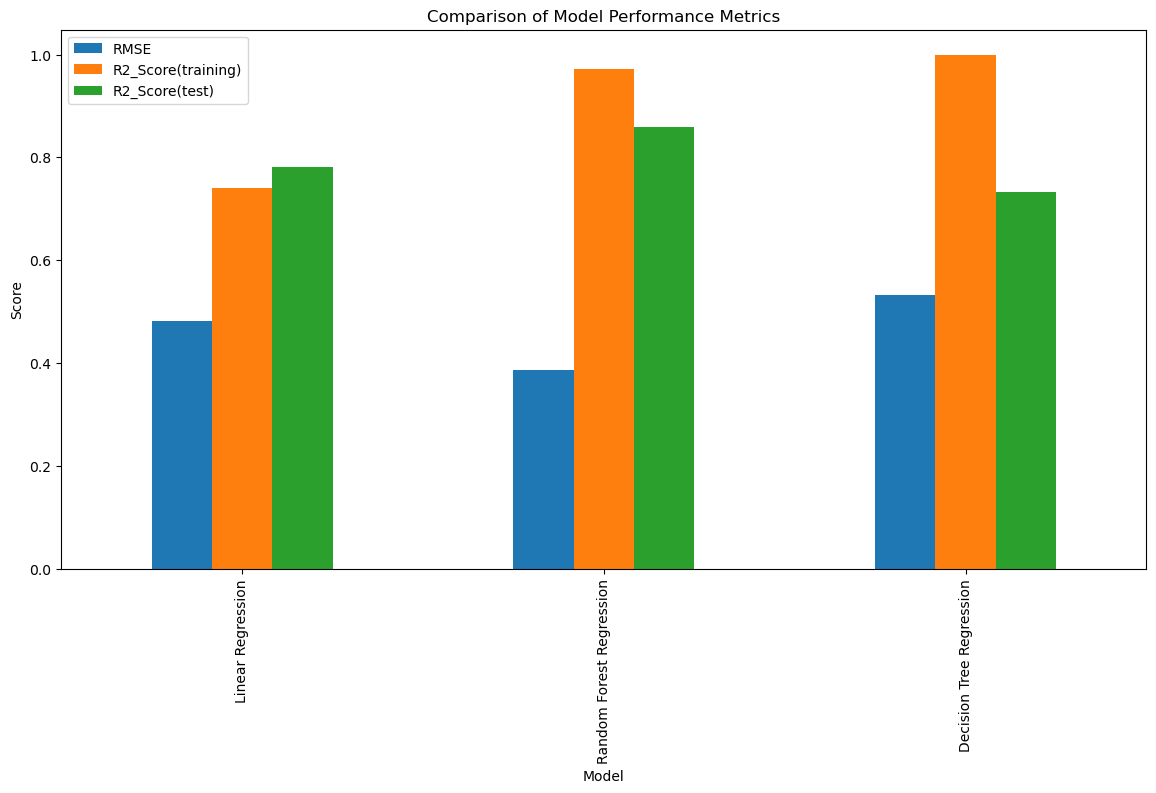

In [24]:
# Create a DataFrame for comparison
metrics = pd.DataFrame(models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])

metrics.set_index('Model').plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='best')
plt.show()


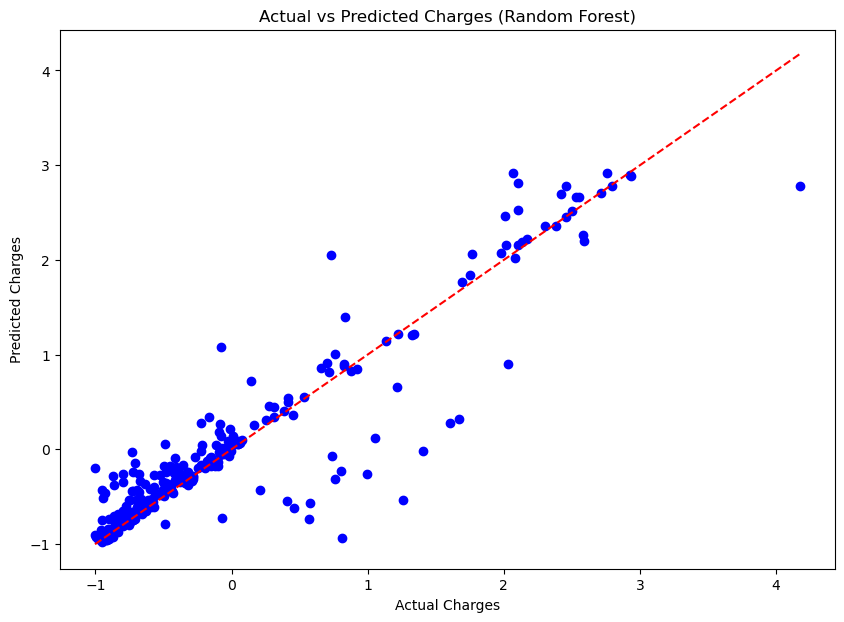

In [25]:
#Actual vs Predicted Values
y_pred_rf_test = rf.predict(X_test) 
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_rf_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Random Forest)')
plt.show()

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520
--------------------------------------------------
Size of X_train_ :  (1070, 4)
--------------------------------------------------
Size of y_train_ :  (1070, 1)
--------------------------------------------------
Size of X_test_ :  (268, 4)
--------------------------------------------------
Size of y_test_ :  (268, 1)
--------------------------------------------------

Results in Training and Testing Set
R2 score (train) : 0.881
--------------------------------------------------
R2 score (test) : 0.876
--------------------------------------------------


C:\Users\himan\AppData\Local\Temp\ipykernel_3080\3143913428.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='Blues')


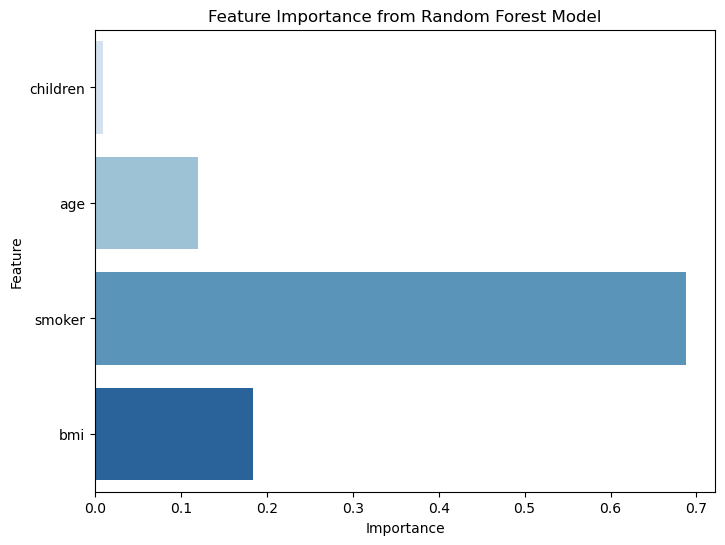

In [26]:
# Display the initial data for reference
print(data_copy.head())
print("-" * 50)

# Select only the four most important features
X_ = data_copy[['children', 'age', 'smoker', 'bmi']].values  # Select only the four features
y_ = data_copy['charges'].values.reshape(-1, 1)  # Target variable remains the same

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print("-" * 50)
print('Size of y_train_ : ', y_train_.shape)
print("-" * 50)
print('Size of X_test_ : ', X_test_.shape)
print("-" * 50)
print('Size of y_test_ : ', y_test_.shape)
print("-" * 50)

# Define the Random Forest Regressor model with pre-set parameters
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7, n_estimators=1200)

# Train the Random Forest Regressor on the selected features
rf_reg.fit(X_train_, y_train_.ravel())

# Predicting for training data
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

# Predicting for test data
y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

# Results on training and testing set
print("\nResults in Training and Testing Set")
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print("-" * 50)
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))
print("-" * 50)

# Visualizing the manual feature importance (if needed)
# Note: Random Forest automatically calculates feature importance during training.
# If you want to visualize the importance of these four features:
importances = rf_reg.feature_importances_
feature_names = ['children', 'age', 'smoker', 'bmi']

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette='Blues')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [56]:
import numpy as np
from sklearn.metrics import r2_score

# Function to convert scaled output back to original values (since the charges were scaled)
def inverse_transform_charge(scaled_value, original_mean, original_std):
    return scaled_value * original_std + original_mean

# Mean and standard deviation of charges before scaling (replace with actual values from your dataset)
mean_charges = 13270.422265141257  # Example mean of 'charges' from original dataset
std_charges = 12110.011236693994   # Example std deviation of 'charges' from original dataset

# Assuming the RandomForestRegressor model is already trained and stored in variable 'rf'
# rf is the trained RandomForestRegressor model

# User input for prediction based on most important features
print("Please enter the following details for insurance cost prediction:")

# Taking user input
children = int(input("Enter number of children (e.g., 2): "))
age = float(input("Enter age (e.g., 25): "))
smoker = int(input("Enter smoker status (0 for no, 1 for yes): "))
bmi = float(input("Enter BMI (e.g., 28.5): "))

# Prepare the input features as an array (order: children, age, smoker, bmi)
input_features = np.array([children, age, smoker, bmi]).reshape(1, 4)

# Make prediction using the trained model
predicted_scaled_cost = rf.predict(input_features)[0]

# Inverse transform the predicted scaled value to get the original cost in rupees
predicted_cost_in_rupees = inverse_transform_charge(predicted_scaled_cost, mean_charges, std_charges)

# Print the predicted insurance cost
print(f"\nThe predicted insurance cost is: ₹{predicted_cost_in_rupees:.2f}")
print("Thank you for choosing Secure Health. We prioritize your health and well-being.")


# Make predictions using the correct feature indices
y_pred = rf.predict(X_test_[:, [0, 1, 2, 3]])  # Using the correct order: children, age, smoker, bmi
# Calculate R² score on the test data
r2_score_test = r2_score(y_test_, y_pred)

# Print the accuracy (R² score)
print(f"Model accuracy (R² score on test data): {r2_score_test:.3f}")

Please enter the following details for insurance cost prediction:


Enter number of children (e.g., 2):  1
Enter age (e.g., 25):  18
Enter smoker status (0 for no, 1 for yes):  0
Enter BMI (e.g., 28.5):  33.77



The predicted insurance cost is: ₹16361.07
Thank you for choosing Secure Health. We prioritize your health and well-being.
Model accuracy (R² score on test data): -1.083
